# Predição de Valor de imóvel com *Regressão Linear*

## O que é Regressão Linear?

![error](https://developers.google.com/machine-learning/crash-course/images/LossSideBySide.png)

![formula](https://image.slidesharecdn.com/8-1209490505240696-9/95/multiple-linear-regression-16-638.jpg?cb=1489720634)

## Quando eu uso uma regressão?

Quando você está trabalhando com variáveis contínuas. 

**Exemplo**: Você sabe o valor da sua casa? Como você construiria um modelo para prever o valor dos imóveis da sua cidade?


![Question](https://media.giphy.com/media/3o7buirYcmV5nSwIRW/giphy.gif)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import seaborn as sns
import numpy as np
%matplotlib inline 

Vamos usar o [Boston Housing Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/) para prever valores de imóveis em Boston 

Primeiro carregue o dataset. Vamos dar uma roubada e usar o dataset da biblioteca do sklearn.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston)

{'data': array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]]), 'target': array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.

O dataset vem em formato de dicionário - Precisamos transformar ele em DataFrame. Mas, antes vamos ver as descrições das variáveis. 

Como vejo as chaves de um dicionário?

Vamos verificar a chave que descreve como o dataset está estruturado. É a chave `DESCR`.

Transformar o dicionário em um dataframe:

Qual dessas variáveis parece ser a mais importante? Conseguimos fazer alguma coisa para testar como a nossa variável resposta se comporta com outras variáveis?

Primeiro precisamos colocar a variável resposta no dataset

In [10]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Vamos ver se fizemos tudo certinho verificando o tamanho do Dataframe.

A descrição não estava mentido. Existem 506 registros e 14 colunas. Fizemos tudo certo até aqui

Agora sim!
![cat_approves](https://media.giphy.com/media/eUQVeW0WEwGxq/giphy.gif)

## Bora explorar os dados!

![cat_evil](https://media.giphy.com/media/LkjlH3rVETgsg/giphy.gif)

### Vamos dar uma olhada na variável resposta

In [5]:
# distribuição

In [4]:
# boxplot (?)

## Simple linear regression

Agora vamos escolher um atributo que acreditamos ser o mais relevante. E rodar uma regressão linear simples com esse atributo. Mas, como vamos escolher esse atributo entre os 13? A primeira coisa que podemos fazer é levantar algumas hipóteses.

Inicialmente vamos ver a distribuição de cada variável com o `describe`

Quais variáveis são categóricas? Quais variáveis são numéricas?

Por enquanto vamos trabalhar só com os atributos em negrito. Mais especificamente, neste primeiro momento, vamos ver o atributo `RM` - o número de quartos

**Attribute Information (in order)** 

 - CRIM     per capita crime rate by town
 - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS    proportion of non-retail business acres per town
 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX      nitric oxides concentration (parts per 10 million)
 - ** RM       average number of rooms per dwelling**
 - AGE      proportion of owner-occupied units built prior to 1940
 - DIS      weighted distances to five Boston employment centres
 - RAD      index of accessibility to radial highways
 - TAX      full-value property-tax rate per $10,000
 - ** PTRATIO  pupil-teacher ratio by town **
 - B       1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 
 - ** LSTAT lower status of the population **
 - MEDV     Median value of owner-occupied homes in $1000's

### RM  -  average number of rooms per dwelling

Distribuição da variável

Vamos testar a correlação dessa variável com o valor dos imóveis. Qual plot podemos usar?

Vamos ver a correlção de Pearson usando o método `corr` do pandas

Agora vamos testar fazer um preditor de valor de imóveis usando apenas o número de quartos

Precisamos separar o dataset em treino e teste e também pegar a variável resposta

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

Vamos fazer um regplot para ver como ficaram as nossas predições?

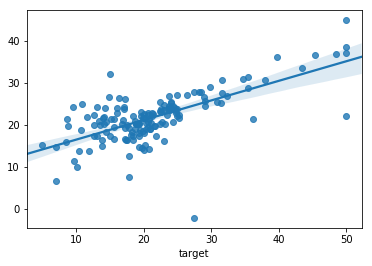

Agora vamos ver como ficaram os coeficientes e o intercepto

Cada vez que aumenta em 1 quarto médio, o valor do imóvel muda (no caso aumenta) em 9.11 dólares.

![cat_money](https://media.giphy.com/media/B13M28xf92UOA/giphy.gif)

A variável Y_pred guarda todas as predições que foram feitas com o algoritmo. Mas e se quisermos usar a fórmula da regressão linear para não só interpretar os `inputs`, mas também calcular a predição?

In [24]:
X_test.iloc[0][0]

RM    6.416
Name: 173, dtype: float64

In [25]:
Y_pred[0]

23.839436259494313

Usando a equação da regressão linear é possível obter os mesmos resultados que o que está no `Y_pred[0]`

Qual a vantagem de conhecer a fórmula? 

Nesse modelo consiguimos ver que a cada número de quartos o valor do imóvel cresce 9.19 pontos - Exatamente o valor do beta1[0].

Vamos verificar o erro dessa solução:

Podemos usar o MSE que é o **M**ean **S**quared **E**rror

In [27]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

40.3514496979


> É uma medida de qualidade de um preditor. Os valores nunca serão negativos e quanto mais próximo de zero melhor. 

Quanto menor o erro quadrático médio, melhor.

Podemos usar também o R quadrado ou R squared

> Indica a força da associação linear entre as variáveis dependente e independente.
Em alguns casos pode ser negativo :o

Segundo a doc do sklearn:
>  The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)

In [28]:
sklearn.metrics.r2_score(Y_test, Y_pred)  

0.45846499343030678

Vamos fazer um modelo com outra variável agora. Agora vamos utilizar o **LSTAT - % lower status of the population**


### LSTAT - % lower status of the population

![cat_typing](https://media.giphy.com/media/ule4vhcY1xEKQ/giphy.gif)

Distribuição da variável

Gráfico de Correlação da variável com a resposta

Essa variável tem um comportamento igual ao da anterior?

Correlação de pearson com a variável resposta

Definir novos X e Y

Dividir o dataset em treino e teste

Treinar o novo modelo

Verificar as predições com um `regplot`

Vamos usar o r quadrático médio para avaliar qual dos modelos tem o menor erro quadrático

Podemos usar também o r quadrado para validar o erro

Esse modelo é um pouco melhor que o anterior...

Agora... A vida num é assim né?! Vocês acham que é melhor fazer um modelo com uma variável ou com todas que eu tenho?

## Regressão linear multivariável

Existe uma maneira de fazer a correlação com todas as variáveis possíveis?

In [38]:
important_vars = boston_data[['RM', 'PTRATIO', 'LSTAT']]

In [39]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html

### Matriz de correlação

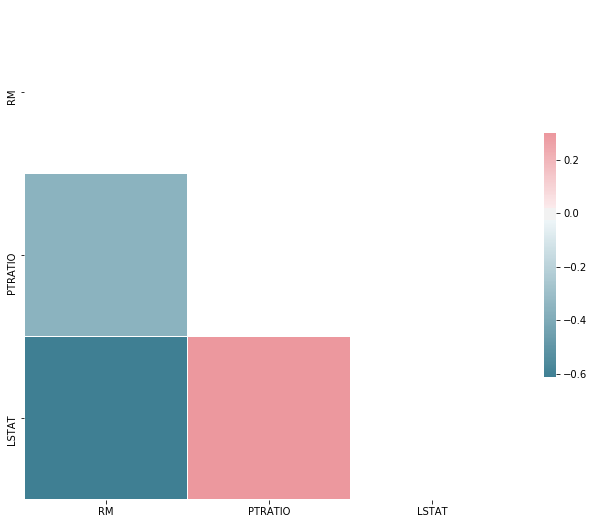

In [42]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Experimentem tirar o mask para ver como fica

### Verificar a distribuição da variável que resta - PTRATIO

![cat_nail_care](https://media.giphy.com/media/mlvseq9yvZhba/giphy.gif)

### Realizar a regressão Linear para as 3 variáveis mais importantes

Esse modelo é melhor ou pior que os anteriores? Qual o melhor modelo?

Vamos ver o gráfico delas

### Como fica a equação com várias variáveis?

In [53]:
Y_pred[0]

26.922986266094941

### E o que nos entendemos desse modelo?

In [54]:
lm.coef_.tolist()

[4.461625982334123, -0.8629045222949957, -0.6081500012893645]

### E se eu colocasse todas as variáveis?

### Primeiro vamos dar uma olhada nas correlações gerais

Com essa matriz nos já podemos ter uma ideia de quais variáveis são mais interessantes do que outras.

Caso a gente fique com variáveis altamente correlacionadas podemos entrar em um problema de multicolinearidade. Quais variáveis podemos remover?


Depois nos dados que nós ainda não olhamos

E daí fazer o treinamento de novo

### Vamos remover variáveis correlacionadas

## Outros desafios usando Regressão

 - [Kaggle: a first experience on Machine Learning and Regression Challenges](https://medium.com/@pramos/kaggle-a-first-experience-on-machine-learning-and-regression-challenges-446436901b7e)
 - [Predicting House Prices Playground Competition: Winning Kernels](http://blog.kaggle.com/2017/03/29/predicting-house-prices-playground-competition-winning-kernels/)